<a href="https://colab.research.google.com/github/mAn-He/mAn-He/blob/main/%EC%A0%84%EB%B3%B5%EB%82%98%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
import scipy as sp

In [2]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/전복/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/전복/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이콘/전복/sample_submission.csv')

In [3]:
train

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6
...,...,...,...,...,...,...,...,...,...,...
1248,1249,I,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
1249,1250,I,0.395,0.310,0.085,0.3170,0.1530,0.0505,0.0935,7
1250,1251,F,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7
1251,1252,F,0.445,0.335,0.110,0.4355,0.2025,0.1095,0.1195,6


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB


In [5]:
test

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.1210,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.9270,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.0970,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.1020,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.1130,0.5175,0.2440,0.3050
...,...,...,...,...,...,...,...,...,...
2919,2920,I,0.170,0.105,0.035,0.0340,0.0120,0.0085,0.0050
2920,2921,I,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060
2921,2922,I,0.570,0.450,0.135,0.7940,0.3815,0.1415,0.2450
2922,2923,I,0.460,0.350,0.120,0.4885,0.1930,0.1050,0.1550


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2924 non-null   int64  
 1   Gender          2924 non-null   object 
 2   Lenght          2924 non-null   float64
 3   Diameter        2924 non-null   float64
 4   Height          2924 non-null   float64
 5   Whole Weight    2924 non-null   float64
 6   Shucked Weight  2924 non-null   float64
 7   Viscra Weight   2924 non-null   float64
 8   Shell Weight    2924 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.7+ KB


In [7]:
train.columns[(train.dtypes == object)]

Index(['Gender'], dtype='object')

In [8]:
train['Gender'].unique()

array(['M', 'I', 'F'], dtype=object)

In [9]:
train.drop('id', axis=1, inplace=True) 
test.drop('id', axis=1, inplace=True) 

In [10]:
train.replace(['M','I','F'], [1, 0, -1], inplace = True)
test.replace(['M','I','F'], [1, 0, -1], inplace = True)

In [11]:
train

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6
...,...,...,...,...,...,...,...,...,...
1248,0,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
1249,0,0.395,0.310,0.085,0.3170,0.1530,0.0505,0.0935,7
1250,-1,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7
1251,-1,0.445,0.335,0.110,0.4355,0.2025,0.1095,0.1195,6


In [12]:
train.describe()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.071030,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.820406,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,-1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,-1.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,1.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,1.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


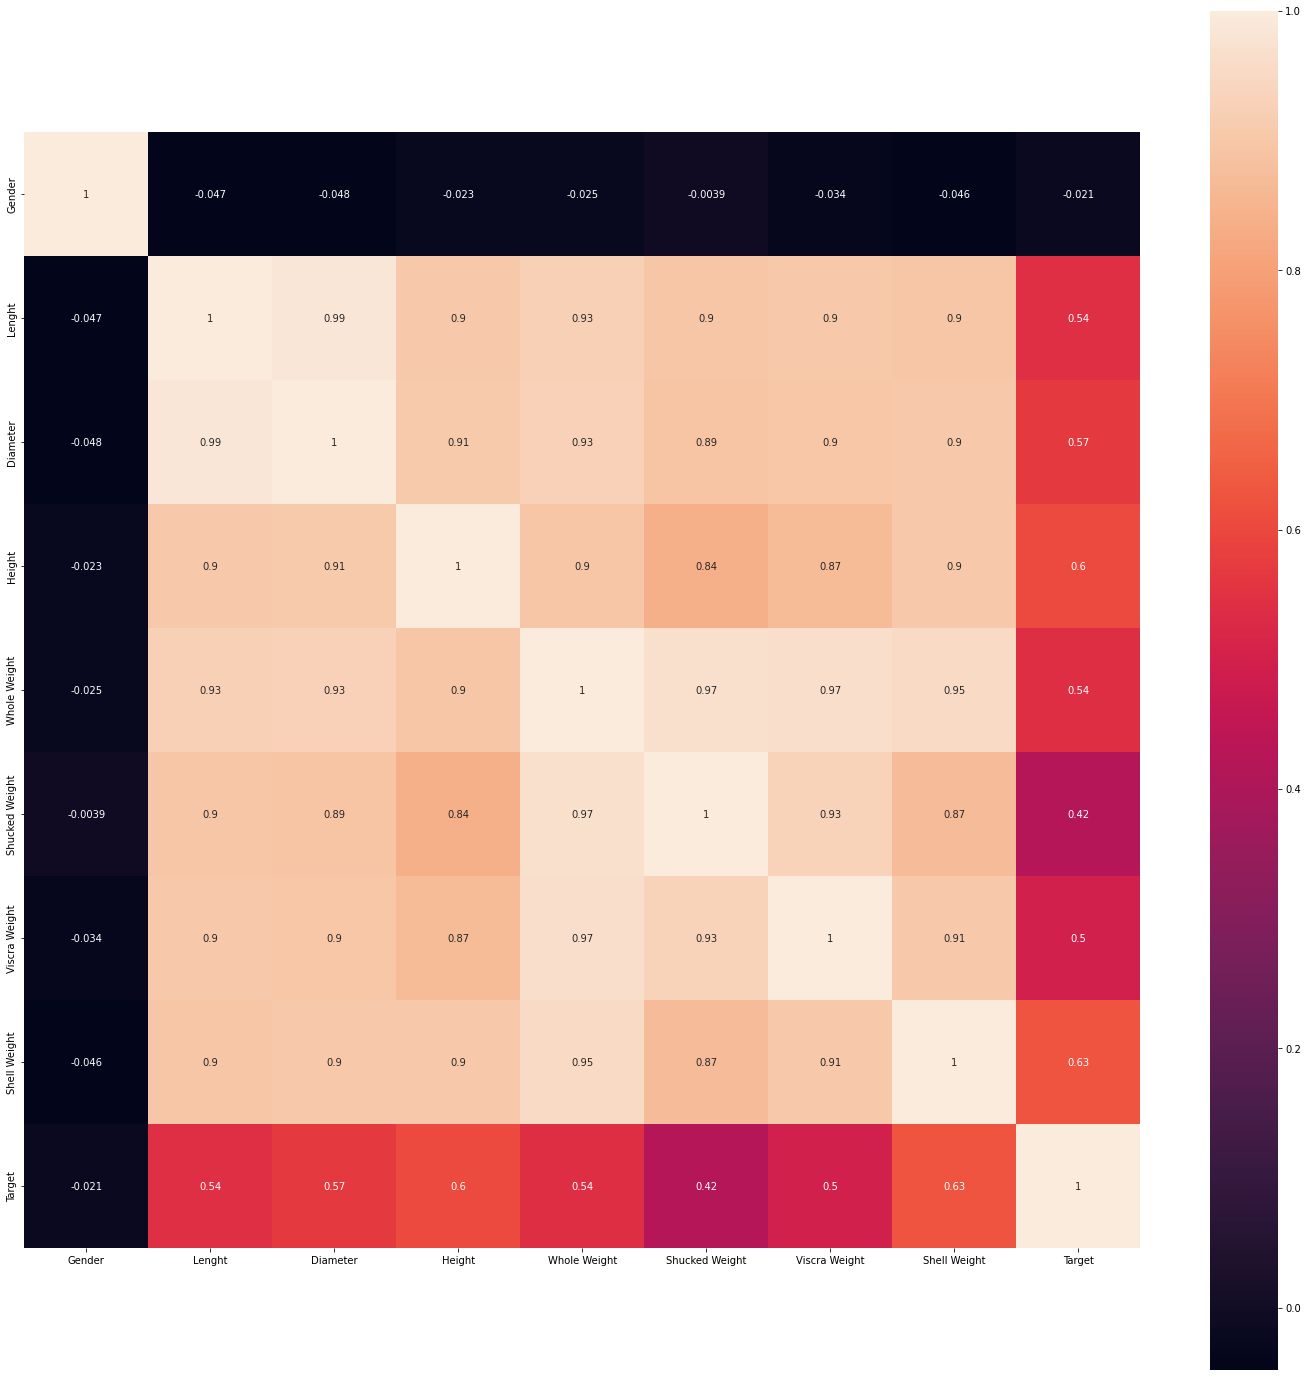

In [13]:
plt.subplots(figsize=(25,25))

sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

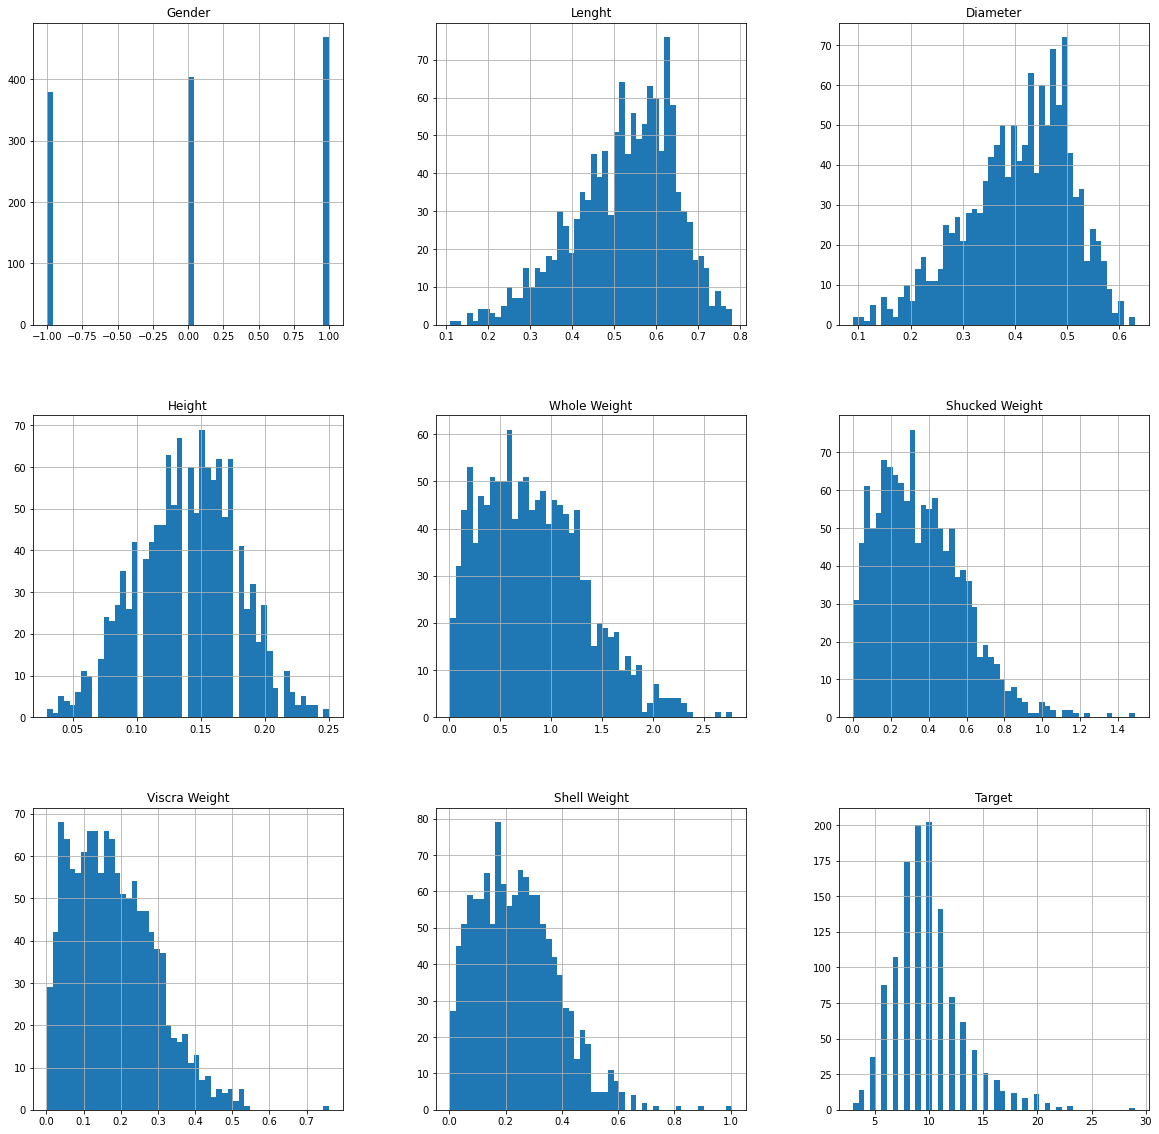

In [14]:
train.hist(bins=50, figsize=(20,20))
plt.show()
#분포 확인을 위한 그래프
#target의 분포가 왼쪽으로 기울어져 있습니다.

In [15]:
train.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

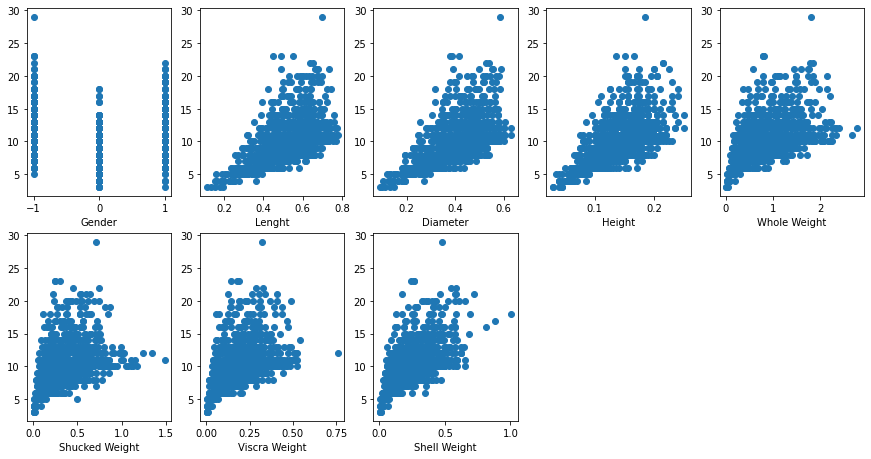

In [16]:
plt.figure(figsize = (15,20))
for i in range(len(train.columns)-1):
  plt.subplot(5,5,i+1)
  plt.xlabel(train.columns[i])
  plt.scatter(train[train.columns[i]], train['Target'])
  

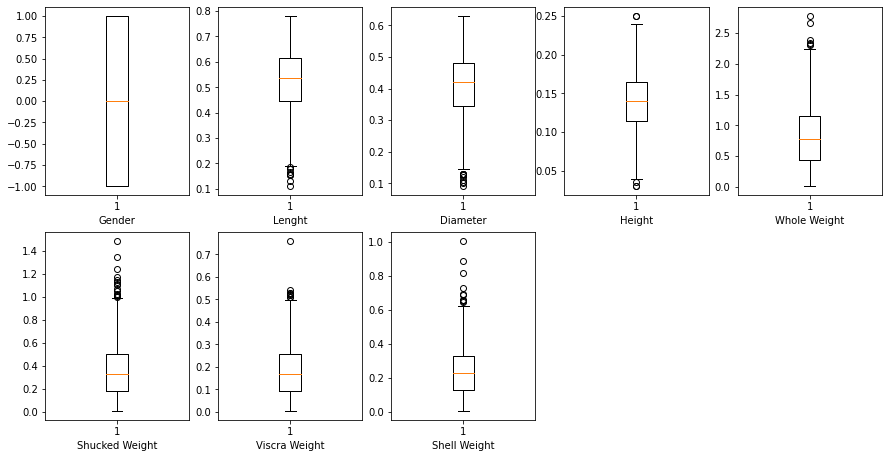

In [17]:

plt.figure(figsize = (15,20))
for i in range(len(train.columns)-1):
  plt.subplot(5,5,i+1)
  plt.xlabel(train.columns[i])
  plt.boxplot(train[train.columns[i]])
  

In [18]:
"""
quartile_1 = test.quantile(0.25)
quartile_3 = test.quantile(0.75)

IQR = quartile_3 - quartile_1
condition = (test < (quartile_1 - 1.5 * IQR)) | (test > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
test = test[condition]
print('훈련데이터 Shape', test.shape)

print('교과서 방법으로 이상치가 제거된 모습')
fig, ax = plt.subplots(nrows = 2, ncols = 6, figsize = (18, 10))

num = 0
ax = ax.flatten()

for col in list(test.columns[0:]):
    sns.boxplot(test[col], ax = ax[num])
    num += 1    
    
plt.show()
"""

"\nquartile_1 = test.quantile(0.25)\nquartile_3 = test.quantile(0.75)\n\nIQR = quartile_3 - quartile_1\ncondition = (test < (quartile_1 - 1.5 * IQR)) | (test > (quartile_3 + 1.5 * IQR))\ncondition = condition.any(axis=1)\ntest = test[condition]\nprint('훈련데이터 Shape', test.shape)\n\nprint('교과서 방법으로 이상치가 제거된 모습')\nfig, ax = plt.subplots(nrows = 2, ncols = 6, figsize = (18, 10))\n\nnum = 0\nax = ax.flatten()\n\nfor col in list(test.columns[0:]):\n    sns.boxplot(test[col], ax = ax[num])\n    num += 1    \n    \nplt.show()\n"

In [19]:
def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr *1.5)
  upper_bound = q3 + (iqr*1.5)

  return np.where((data > upper_bound)|(data < lower_bound))

In [20]:
#이상치 제거를 위해서 None으로 바꾼 후 머신 러닝 모델을 돌려서 결측값 메우는 방식으로 했습니다.
Lenght_out_index= outliers_iqr(train['Lenght'])[0]
Diameter_out_index = outliers_iqr(train['Diameter'])[0]
Height_out_index = outliers_iqr(train['Height'])[0]
Whole_Weight_out_index = outliers_iqr(train['Whole Weight'])[0]
Shucked_out_index = outliers_iqr(train['Shucked Weight'])[0]
Viscra_out_index = outliers_iqr(train['Viscra Weight'])[0]
Shell_out_index = outliers_iqr(train['Shell Weight'])[0]

In [21]:
Lenght_out_index_t= outliers_iqr(test['Lenght'])[0]
Diameter_out_index_t = outliers_iqr(test['Diameter'])[0]
Height_out_index_t = outliers_iqr(test['Height'])[0]
Whole_Weight_out_index_t = outliers_iqr(test['Whole Weight'])[0]
Shucked_out_index_t = outliers_iqr(test['Shucked Weight'])[0]
Viscra_out_index_t = outliers_iqr(test['Viscra Weight'])[0]
Shell_out_index_t = outliers_iqr(test['Shell Weight'])[0]

In [22]:
train.loc[Lenght_out_index, 'Lenght'] = None

In [23]:
test.loc[Lenght_out_index_t, 'Lenght'] = None

In [24]:
len_data = train.loc[train['Lenght'].notna() == True]
na_len_data = train.loc[train['Lenght'].isna() == True]


In [25]:
len_data_t = test.loc[test['Lenght'].notna() == True]
na_len_data_t = test.loc[test['Lenght'].isna() == True]


In [26]:
len_data.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

In [27]:
len_data_t.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight'],
      dtype='object')

In [28]:
features_len = [
    'Gender', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'
]


In [29]:
features_len_t = ['Gender',  'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight']

In [30]:
train_len = len_data[features_len]
test_len = len_data['Lenght']

In [31]:
train_len_t = len_data_t[features_len_t]
test_len_t = len_data_t['Lenght']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train_len, x_test_len, y_train_len, y_test_len = train_test_split(train_len, test_len, random_state=23, test_size=0.1)
x_train_lent, x_test_lent, y_train_lent, y_test_lent = train_test_split(train_len_t, test_len_t, random_state=23, test_size=0.1)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



In [35]:
model_na_lgbm = LGBMRegressor().fit(train_len, test_len)
pred_len = model_na_lgbm.predict(na_len_data[features_len])

In [36]:
model_na_lgbmt = LGBMRegressor().fit(train_len_t, test_len_t)
pred_lent = model_na_lgbmt.predict(na_len_data_t[features_len_t])

In [37]:
train.loc[Lenght_out_index, 'Lenght'] = pred_len
test.loc[Lenght_out_index_t, 'Lenght'] = pred_lent

In [38]:
test.isna().sum()

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
dtype: int64

In [39]:
train.loc[Diameter_out_index, 'Diameter'] = None
test.loc[Diameter_out_index_t, 'Diameter'] = None

In [40]:
dia_data = train.loc[train['Diameter'].notna() == True]
na_dia_data = train.loc[train['Diameter'].isna() == True]

dia_datat = test.loc[test['Diameter'].notna() == True]
na_dia_datat = test.loc[test['Diameter'].isna() == True]


In [41]:
dia_data.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

In [42]:
dia_datat.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight'],
      dtype='object')

In [43]:
features_dia = ['Gender', 'Lenght', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target']

In [44]:
features_diat = ['Gender', 'Lenght', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight']

In [45]:
train_dia = dia_data[features_dia]
test_dia = dia_data['Diameter']

In [46]:
train_diat = dia_datat[features_diat]
test_diat = dia_datat['Diameter']

In [47]:
x_train_dia, x_test_dia, y_train_dia, y_test_dia = train_test_split(train_dia, test_dia, random_state=23, test_size=0.1)
x_train_diat, x_test_diat, y_train_diat, y_test_diat = train_test_split(train_diat, test_diat, random_state=23, test_size=0.1)

In [48]:
model_na_lgbm = LGBMRegressor().fit(train_dia, test_dia)
pred_dia = model_na_lgbm.predict(na_dia_data[features_dia])

model_na_lgbmt = LGBMRegressor().fit(train_diat, test_diat)
pred_diat = model_na_lgbmt.predict(na_dia_datat[features_diat])

In [49]:
train.loc[Diameter_out_index, 'Diameter'] = pred_dia
test.loc[Diameter_out_index_t, 'Diameter'] = pred_diat

In [50]:
train.loc[Height_out_index, 'Height'] = None
test.loc[Height_out_index_t, 'Height'] = None

In [51]:
h_data = train.loc[train['Height'].notna() == True]
na_h_data = train.loc[train['Height'].isna() == True]


h_datat = test.loc[test['Height'].notna() == True]
na_h_datat = test.loc[test['Height'].isna() == True]


In [52]:
h_data.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

In [53]:
h_datat.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight'],
      dtype='object')

In [54]:
features_h = ['Gender', 'Lenght', 'Diameter', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target']


In [55]:
features_ht =  ['Gender', 'Lenght', 'Diameter',  'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight']

In [56]:
train_h = h_data[features_h]
test_h = h_data['Height']

In [57]:
train_ht = h_datat[features_ht]
test_ht = h_datat['Height']

In [58]:
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(train_h, test_h, random_state=23, test_size=0.1)
x_train_ht, x_test_ht, y_train_ht, y_test_ht = train_test_split(train_ht, test_ht, random_state=23, test_size=0.1)

In [59]:
model_na_lgbm = LGBMRegressor().fit(train_h, test_h)
pred_h = model_na_lgbm.predict(na_h_data[features_h])

model_na_lgbmt = LGBMRegressor().fit(train_ht, test_ht)
pred_ht = model_na_lgbmt.predict(na_h_datat[features_ht])

In [60]:
train.loc[Height_out_index, 'Height'] = pred_h
test.loc[Height_out_index_t, 'Height'] = pred_ht

In [61]:
train.loc[Whole_Weight_out_index, 'Whole Weight'] = None
test.loc[Whole_Weight_out_index_t, 'Whole Weight'] = None

In [62]:
ww_data = train.loc[train['Whole Weight'].notna() == True]
na_ww_data = train.loc[train['Whole Weight'].isna() == True]

ww_datat = test.loc[test['Whole Weight'].notna() == True]
na_ww_datat = test.loc[test['Whole Weight'].isna() == True]

In [63]:
features_ww = ['Gender', 'Lenght', 'Diameter', 'Height',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target']


In [64]:
features_wwt = ['Gender', 'Lenght', 'Diameter', 'Height',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight']

In [65]:
train_ww = ww_data[features_ww]
test_ww = ww_data['Whole Weight']

train_wwt = ww_datat[features_wwt]
test_wwt = ww_datat['Whole Weight']


In [66]:
x_train_ww, x_test_ww, y_train_ww, y_test_ww = train_test_split(train_ww, test_ww, random_state=23, test_size=0.1)
x_train_wwt, x_test_wwt, y_train_wwt, y_test_wwt = train_test_split(train_wwt, test_wwt, random_state=23, test_size=0.1)

In [67]:
model_na_lgbm = LGBMRegressor().fit(train_ww, test_ww)
pred_ww = model_na_lgbm.predict(na_ww_data[features_ww])

model_na_lgbmt = LGBMRegressor().fit(train_wwt, test_wwt)
pred_wwt = model_na_lgbmt.predict(na_ww_datat[features_wwt])

In [68]:
train.loc[Whole_Weight_out_index, 'Whole Weight'] = pred_ww
test.loc[Whole_Weight_out_index_t, 'Whole Weight'] = pred_wwt

In [69]:
train.loc[Shucked_out_index, 'Shucked Weight'] = None

sw_data = train.loc[train['Shucked Weight'].notna() == True]
na_sw_data = train.loc[train['Shucked Weight'].isna() == True]

features_sw = ['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
        'Viscra Weight', 'Shell Weight', 'Target']

train_sw = sw_data[features_sw]
test_sw = sw_data['Shucked Weight']

x_train_sw, x_test_sw, y_train_sw, y_test_sw = train_test_split(train_sw, test_sw, random_state=23, test_size=0.1)

In [70]:
test.loc[Shucked_out_index_t, 'Shucked Weight'] = None

sw_datat = test.loc[test['Shucked Weight'].notna() == True]
na_sw_datat = test.loc[test['Shucked Weight'].isna() == True]

features_swt = ['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
        'Viscra Weight', 'Shell Weight']

train_swt = sw_datat[features_swt]
test_swt = sw_datat['Shucked Weight']

x_train_swt, x_test_swt, y_train_swt, y_test_swt = train_test_split(train_swt, test_swt, random_state=23, test_size=0.1)

In [71]:
model_na_lgbm = LGBMRegressor().fit(train_sw, test_sw)
pred_sw = model_na_lgbm.predict(na_sw_data[features_sw])

train.loc[Shucked_out_index, 'Shucked Weight'] = pred_sw

model_na_lgbmt = LGBMRegressor().fit(train_swt, test_swt)
pred_swt = model_na_lgbmt.predict(na_sw_datat[features_swt])

test.loc[Shucked_out_index_t, 'Shucked Weight'] = pred_swt

In [72]:
train.loc[Viscra_out_index, 'Viscra Weight'] = None
vw_data = train.loc[train['Viscra Weight'].notna() == True]
na_vw_data = train.loc[train['Viscra Weight'].isna() == True]

features_vw = ['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight',  'Shell Weight', 'Target']

test.loc[Viscra_out_index_t, 'Viscra Weight'] = None
vw_datat = test.loc[test['Viscra Weight'].notna() == True]
na_vw_datat = test.loc[test['Viscra Weight'].isna() == True]

features_vwt = ['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight',  'Shell Weight']

In [73]:
train_vw = vw_data[features_vw]
test_vw = vw_data['Viscra Weight']

train_vwt = vw_datat[features_vwt]
test_vwt = vw_datat['Viscra Weight']

In [74]:
x_train_vw, x_test_vw, y_train_vw, y_test_vw = train_test_split(train_vw, test_vw, random_state=23, test_size=0.1)
x_train_vwt, x_test_vwt, y_train_vwt, y_test_vwt = train_test_split(train_vwt, test_vwt, random_state=23, test_size=0.1)

In [75]:
model_na_lgbm = LGBMRegressor().fit(train_vw, test_vw)
pred_vw = model_na_lgbm.predict(na_vw_data[features_vw])

model_na_lgbmt = LGBMRegressor().fit(train_vwt, test_vwt)
pred_vwt = model_na_lgbmt.predict(na_vw_datat[features_vwt])

In [76]:
train.loc[Viscra_out_index, 'Viscra Weight'] = pred_vw
test.loc[Viscra_out_index_t, 'Viscra Weight'] = pred_vwt

In [77]:
train.loc[Shell_out_index, 'Shell Weight'] = None
slw_data = train.loc[train['Shell Weight'].notna() == True]
na_slw_data = train.loc[train['Shell Weight'].isna() == True]

features_slw = ['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Target']
train_slw = slw_data[features_slw]
test_slw = slw_data['Shell Weight']


In [78]:
test.loc[Shell_out_index_t, 'Shell Weight'] = None
slw_datat = test.loc[test['Shell Weight'].notna() == True]
na_slw_datat = test.loc[test['Shell Weight'].isna() == True]

features_slwt = ['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight']
train_slwt = slw_datat[features_slwt]
test_slwt = slw_datat['Shell Weight']


In [79]:
test.loc[Shell_out_index_t, 'Shell Weight']

102    NaN
112    NaN
128    NaN
365    NaN
397    NaN
568    NaN
683    NaN
718    NaN
1000   NaN
1010   NaN
1080   NaN
1390   NaN
1429   NaN
1488   NaN
1507   NaN
1898   NaN
1962   NaN
2101   NaN
2117   NaN
2128   NaN
2181   NaN
2210   NaN
2231   NaN
2239   NaN
2253   NaN
2385   NaN
2464   NaN
2668   NaN
2875   NaN
2881   NaN
Name: Shell Weight, dtype: float64

In [80]:
len(na_slw_datat)

30

In [81]:
x_train_slw, x_test_slw, y_train_slw, y_test_slw = train_test_split(train_slw, test_slw, random_state=23, test_size=0.1)
x_train_slwt, x_test_slwt, y_train_slwt, y_test_slwt = train_test_split(train_slwt, test_slwt, random_state=23, test_size=0.1)

In [83]:
model_na_lgbm = LGBMRegressor().fit(train_slw, test_slw)
pred_slw = model_na_lgbm.predict(na_slw_data[features_slw])

train.loc[Shell_out_index, 'Shell Weight'] = pred_slw

model_na_lgbmt = LGBMRegressor().fit(train_slwt, test_slwt)
pred_slwt = model_na_lgbmt.predict(na_slw_datat[features_slwt])


In [84]:

test.loc[Shell_out_index_t, 'Shell Weight'] = pred_slwt

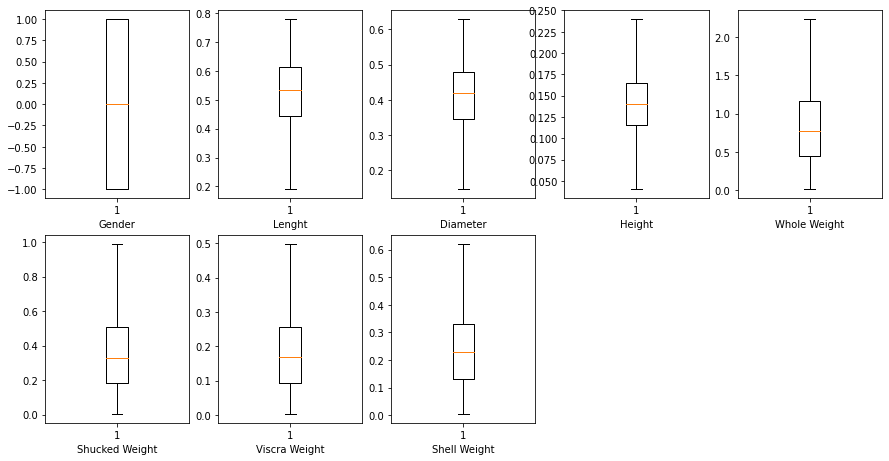

In [85]:

plt.figure(figsize = (15,20))
for i in range(len(train.columns)-1):
  plt.subplot(5,5,i+1)
  plt.xlabel(train.columns[i])
  plt.boxplot(train[train.columns[i]])
  

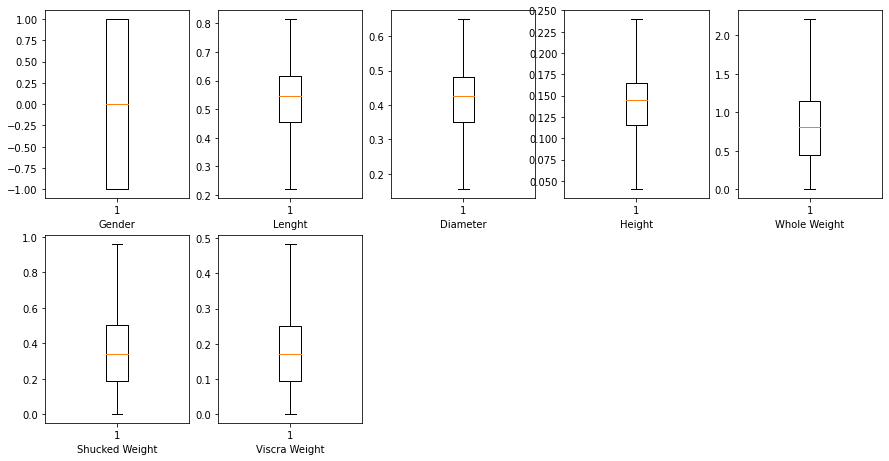

In [86]:

plt.figure(figsize = (15,20))
for i in range(len(test.columns)-1):
  plt.subplot(5,5,i+1)
  plt.xlabel(test.columns[i])
  plt.boxplot(test[test.columns[i]])
  

In [87]:
train[train["Whole Weight"] < train["Shucked Weight"] + train["Shell Weight"]]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,0,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,0,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,0,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,0,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,0,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [88]:
train = train[train["Whole Weight"] >= train["Shucked Weight"] + train["Shell Weight"]]

In [89]:
train[train["Shucked Weight"] < train["Viscra Weight"]]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,1,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [90]:
train = train[train["Shucked Weight"] >= train["Viscra Weight"]]

In [91]:
train[(train['Whole Weight'] - (train['Shucked Weight'] + train['Viscra Weight'] + train['Shell Weight']))<0]


,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
119,0,0.375000,0.280000,0.080,0.2165,0.0935,0.0925,0.0700,7
129,0,0.485000,0.365000,0.140,0.4475,0.1895,0.0925,0.2305,8
179,0,0.215000,0.155000,0.060,0.0525,0.0210,0.0165,0.0150,5
224,0,0.450000,0.335000,0.105,0.4470,0.2335,0.1530,0.1190,7
290,-1,0.480000,0.380000,0.145,0.5900,0.2320,0.1410,0.2300,12
324,0,0.420000,0.330000,0.100,0.3520,0.1635,0.0890,0.1000,9
346,0,0.260000,0.215000,0.080,0.0990,0.0370,0.0255,0.0450,5
368,0,0.290000,0.225000,0.075,0.1520,0.0710,0.0590,0.0450,9
374,0,0.360000,0.275000,0.095,0.2170,0.0840,0.0435,0.0900,7
418,0,0.410000,0.330000,0.105,0.3350,0.1525,0.0740,0.1100,7


In [92]:
train = train[(train['Whole Weight'] - (train['Shucked Weight'] + train['Viscra Weight'] + train['Shell Weight']))>=0]

In [93]:
train["Shell Water"] = round(train["Whole Weight"] - (train["Shucked Weight"] + train["Shell Weight"]),3)
test["Shell Water"] = round(test["Whole Weight"] - (test["Shucked Weight"] + test["Shell Weight"]),3)

In [94]:
train["ratio"] = round(train["Shucked Weight"] / train["Whole Weight"],3)
test["ratio"] = round(test["Shucked Weight"] / test["Whole Weight"] ,3)

In [95]:
train["density"] = round(train["Shucked Weight"] / (train["Lenght"]* train["Diameter"] * train["Height"]),3)
test["density"] = round(test["Shucked Weight"] / (test["Lenght"]* test["Diameter"] * test["Height"]),3)

In [96]:
test.isna().sum()

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Shell Water       0
ratio             0
density           0
dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


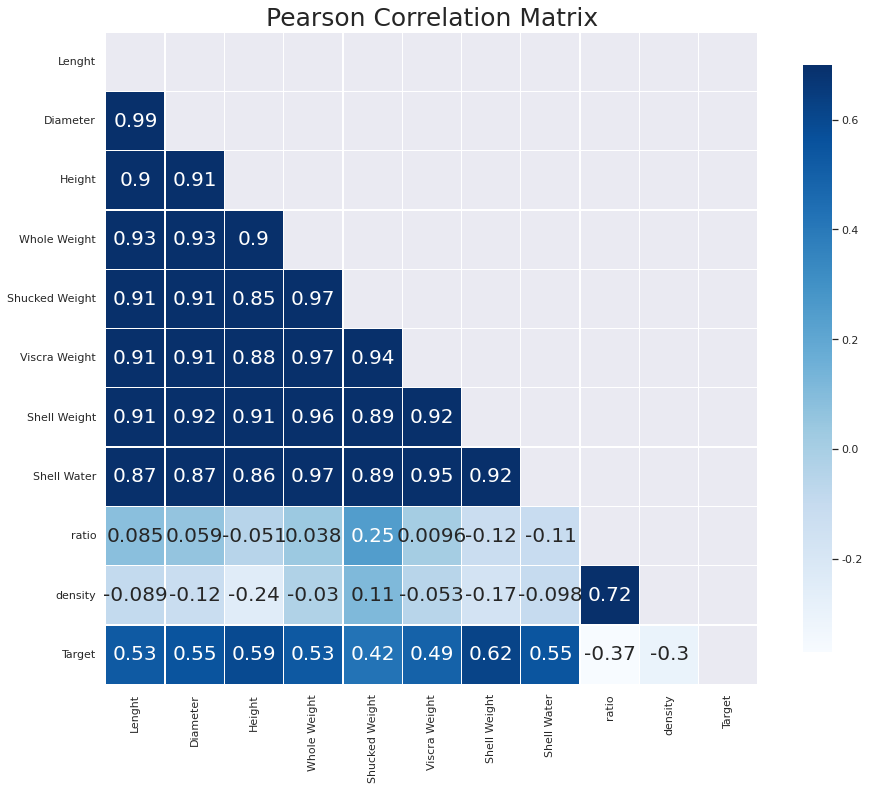

In [97]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set(font="NanumGothic")

import warnings
warnings.filterwarnings(action='ignore')

features = ['Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 
       'Shell Water', 'ratio','density', 'Target']


# 삼각형 마스크를 만듭니다
mask = np.zeros_like(train[features].corr(), dtype=np.bool) # 우선 상관관계표와 형태가 같고 0이 들어있는 매트릭스를 만들어 줍니다. 12 x 12 Matrix
mask[np.triu_indices_from(mask)] = True # np.triu_indices_from : mask에서 인덱스를 반환 (위쪽 삼각형에 True, 아래 삼각형에 False)

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train[features].corr(),
            linewidths=0.25,# 경계면 선구분 cf. 실선(0.5)으로 구분하기
            vmax=0.7, # 컬러바 범위 : 최소값 미지정 최대값 0.7 
            square=True,
            cmap="Blues", #히트맵 색깔. blue, green #"BuGn_r" to reverse # Blues # BuGn
            linecolor='w',# 라인 색은 흰색(white)
            
            annot=True,            # 실제 값을 표시한다
            annot_kws={"size":20},  # 실제 값 폰트 사이즈
            mask=mask,             # 위에서 설정한 마스크 부분(가릴부분) 지정한다
            cbar_kws={"shrink": .9}); # 오른쪽 컬러바 크기 줄이기 90% 크기

In [98]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [99]:
X = train.drop(['Target'], axis = 1)
y = np.log1p(train['Target'])
#target 분포가 정규분포를 따르지 않아서 log를 사용했습니다.
target = test[X.columns]

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_log, y_test_log = train_test_split(X ,y, random_state=0, shuffle= True, test_size=0.2)


In [101]:
#펭귄몸무게 예측 때 어느 분의 코드를 보고 사용했습니다.
#다시 찾으려고 했지만 결국 못 찾았습니다. 알려주시면 추가하겠습니다.
models=[RandomForestRegressor(random_state=0), KNeighborsRegressor(), BaggingRegressor(random_state=0),
        GradientBoostingRegressor(random_state=23), 
        XGBRegressor(random_state=43), LGBMRegressor(random_state=0),
        AdaBoostRegressor(random_state=0), LinearRegression(), SVR(kernel='poly', degree = 2), SVR(kernel='rbf'), 
        Lasso(random_state=0), Ridge(random_state=0),
        ]
     
model_names=['RandomForestRegressor', 'KNeighborsRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor',
             'AdaBoostRegressor', 'LinearRegression', 'SVR_poly', 'SVR_rbf', 'Lasso', 'Ridge'
          ]
nmae_list=[]
# d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train_log)
    test_pred=(clf.predict(x_test))

    k=0
    for i in test_pred:
      if i<0:
        test_pred[k] = 0
      k+=1

    
    nmae_list.append(NMAE(test_pred,y_test_log))


for model in range(len(model_names)):
  print(model_names[model], 'NMAE : \t\t' , nmae_list[model] , '\n')



[04:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RandomForestRegressor NMAE : 		 0.05362729676785588 

KNeighborsRegressor NMAE : 		 0.06714686949374338 

BaggingRegressor NMAE : 		 0.054564006747738564 

GradientBoostingRegressor NMAE : 		 0.05233498337607055 

XGBRegressor NMAE : 		 0.05202803983713154 

LGBMRegressor NMAE : 		 0.05657851956161624 

AdaBoostRegressor NMAE : 		 0.05761919993514913 

LinearRegression NMAE : 		 0.05471960270165332 

SVR_poly NMAE : 		 0.06380421467345887 

SVR_rbf NMAE : 		 0.0604274826707614 

Lasso NMAE : 		 0.08688304410269836 

Ridge NMAE : 		 0.05703739588286677 



In [ ]:
#RandomForestRegressor NMAE : 		 0.05362729676785588 

#BaggingRegressor NMAE : 		 0.054564006747738564 

#GradientBoostingRegressor NMAE : 		 0.05233498337607055  

#XGBRegressor NMAE : 		  0.05202803983713154 

#LGBMRegressor NMAE : 		 0.05657851956161624 

#AdaBoostRegressor NMAE : 		 0.05761919993514913 

#LinearRegression NMAE : 		 0.05471960270165332 

#Ridge NMAE : 		 0.05703739588286677 

In [117]:
from sklearn.model_selection import GridSearchCV


parameters = {
    "n_estimators" : [100,120,140,160,180,200,250,300,500,1000],
    'n_jobs' : [-1],
    'learning_rate': [0.1, 0.05, 0.06, 0.08],
    'max_depth' : [ 4,6,8,10,12]
    }
    
#cv=5 5번의 교차검증.
grid = GridSearchCV(LGBMRegressor(random_state=0), verbose=2, param_grid = parameters, cv=5)
grid.fit(x_train, y_train_log)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_est

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.05, 0.06, 0.08],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [100, 120, 140, 160, 180, 200, 250,
                                          300, 500, 1000],
                         'n_jobs': [-1]},
             verbose=2)

In [118]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'n_jobs': -1}

In [102]:
parameters = {'learning_rate': 0.05, 'max_depth': 4, 
              'n_estimators': 100, 'n_jobs': -1}
lgb = LGBMRegressor(random_state=0, 
                    learning_rate=0.05, max_depth= 4, 
              n_estimators= 100, n_jobs= -1, reg_lambda=5)
lgb.fit(x_train,y_train_log)
test_pred=(lgb.predict(x_test))

(NMAE(test_pred,y_test_log))

#LGBMRegressor NMAE : 		 0.05657851956161624 .

0.05113088562896423

In [119]:
parameters = {
    "n_estimators" : [100,150,1000],
    'max_depth' : [2,3,4,5,6,7,8,9,20]
    
    
    }
    

#cv=5 5번의 교차검증.
grid = GridSearchCV(RandomForestRegressor(random_state=0), verbose=2, param_grid = parameters, cv=5)
grid.fit(x_train, y_train_log)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.3s
[CV] END .....................max_depth=2, n_estimators=1000; total time=   2.1s
[CV] END .....................max_depth=2, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 20],
                         'n_estimators': [100, 150, 1000]},
             verbose=2)

In [120]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 1000}

In [104]:
parameters = {'max_depth': 5, 'n_estimators': 1000}
rfr = RandomForestRegressor(max_depth= 5, 
              n_estimators= 1000)
rfr.fit(x_train,y_train_log)
test_pred=(rfr.predict(x_test))

(NMAE(test_pred,y_test_log))
#RandomForestRegressor NMAE : 		 0.05362729676785588 

0.05155578492825077

In [121]:
parameters = {
    "n_estimators" : [100,150,200],
    'min_samples_split' : [6,8,10],
    'learning_rate': [0.1, 0.05],
    'max_depth' : [ 4,6,8]
    }
    
#verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
#cv=5 5번의 교차검증.
grid = GridSearchCV(GradientBoostingRegressor(random_state=0), verbose=2, param_grid = parameters, cv=5)
grid.fit(x_train, y_train_log)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_sa

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [4, 6, 8],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [122]:
grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [105]:
parameters = {'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_split': 10,
 'n_estimators': 150}
gbr = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 6,
 min_samples_split= 10,
 n_estimators=150, random_state=0)
gbr.fit(x_train,y_train_log)
test_pred=(gbr.predict(x_test))

(NMAE(test_pred,y_test_log))
#GradientBoostingRegressor NMAE : 		 0.05233498337607055

0.05800597022587646

In [123]:
parameters = {
    "n_estimators" : [100,200,500],
    'max_depth' : [2,3,5],
    'n_jobs' : [-1],
    'learing_rate' : [0.1, 0.05, 0.01]
    }
    
#verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
#cv=5 5번의 교차검증.
grid = GridSearchCV(XGBRegressor(random_state=0), parameters, verbose=2, cv=5)
grid.fit(x_train, y_train_log)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[04:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learing_rate=0.1, max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[04:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learing_rate=0.1, max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[04:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learing_rate=0.1, max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[04:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learing_rate=0.1, max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[04:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learing_rate': [0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 200, 500], 'n_jobs': [-1]},
             verbose=2)

In [124]:
grid.best_params_

{'learing_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'n_jobs': -1}

In [106]:
parameters = {'learing_rate': 0.1, 'max_depth': 2, 
              'n_estimators': 500, 'n_jobs': -1}
xgb = XGBRegressor(learning_rate= 0.1,
 max_depth= 2,
 n_jobs=-1 ,
 n_estimators=500, random_state=0)
xgb.fit(x_train,y_train_log)
test_pred=(xgb.predict(x_test))

(NMAE(test_pred,y_test_log))
#XGBRegressor NMAE : 		 0.05929196121598696 


[04:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.05485671570611979

In [107]:
lgb.fit(x_train,y_train_log)
xgb.fit(x_train,y_train_log)
rfr.fit(x_train,y_train_log)
gbr.fit(x_train,y_train_log)



[04:16:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GradientBoostingRegressor(max_depth=6, min_samples_split=10, n_estimators=150,
                          random_state=0)

In [109]:
rfr_p = rfr.predict(target)
gbr_p = gbr.predict(target)
xgb_p = xgb.predict(target)
lgb_p = lgb.predict(target)

In [110]:
lgb_pred = (np.expm1(lgb_p.reshape(-1,1)))
rfr_pred =  (np.expm1(rfr_p.reshape(-1,1)))
gbr_pred = (np.expm1(gbr_p.reshape(-1,1)))
xgb_pred = (np.expm1(xgb_p.reshape(-1,1)))


In [111]:
lgb_pred

array([[10.63810862],
       [12.95631782],
       [ 5.4493383 ],
       ...,
       [ 9.21629169],
       [ 9.44302139],
       [10.99966918]])

In [112]:
rfr_pred

array([[10.45336968],
       [13.31398594],
       [ 5.36296894],
       ...,
       [ 9.02355303],
       [ 9.72035279],
       [11.41601504]])

In [113]:
gbr_pred

array([[11.23638328],
       [13.46774752],
       [ 5.27124197],
       ...,
       [ 9.85870708],
       [ 9.879646  ],
       [10.05968993]])

In [114]:
xgb_pred

array([[11.14919 ],
       [12.174976],
       [ 5.288225],
       ...,
       [ 9.096036],
       [ 9.688713],
       [10.489915]], dtype=float32)

In [115]:
Marine5 = (lgb_pred*0.3 + rfr_pred*0.2 +gbr_pred*0.25 + xgb_pred*0.25)
Marine5

array([[10.87849983],
       [12.9603735 ],
       [ 5.34726206],
       ...,
       [ 9.30828387],
       [ 9.66906674],
       [10.72050497]])

In [116]:
submission['Target'] = Marine5
submission.to_csv('Marine5.csv', index=False)